<h1> Introduction </h1>

Heart disease is a prevalent and serious health condition that affects a significant portion of the global population,therefore, it is crucial to identify effective predictors to accurately predict a person's heart health status. 

<b> The primary question addressed in this report is whether incorporating smoking data as a predictor can enhance the accuracy of heart disease prediction </b>, with the rationale behind this being that although age and cholestrol are proven by numerous studies to be strongly correlated with heart diseases, the relationship between smoking and heart disease remain unclear; however, with some literature suggesting a correlation between smoking and heart disease, the topic of whether smoking may be a good predictor for predicting heart diseases is plausible and worth investigating.

In order to investigate the effectiveness of using smoking as a predictor of heart diseases, 2 models were built, base model, and merged model. The base model utilitizes 2 predictors, cholestrol and age, which are both suggested by existing literature to be good indicators of heart diseases. Namely, in the study "Age and Cardiovascular Risk Attributable to Apolipoprotein B, Low-Density Lipoprotein Cholesterol or Non-High-Density Lipoprotein Cholesterol." (Wilson et al., 2007), it is suggested that advancing age is strongly associated with an increased risk of heart disease, and elevated levels of apolipoprotein B and LDL cholesterol contribute to this risk; and in the study  "Cholesterol and Coronary Heart Disease: Predicting Risks in Older Men: The National Heart, Lung, and Blood Institute Coronary Heart Disease Risk Assessment System." (Wilson et al., 1998) it is demonstrated that high cholesterol levels, especially elevated levels of LDL cholesterol, were strongly associated with an increased risk of CHD in older men.


Thus, it is reasonable to train a base model using cholestrol and age as predictors based on observations made in existing studies. The merged model will include 3 predictors, cholestrol, age and smoking data, and the two will be contrasted to answer the research question of whether incorporating smoking data as a predictor can enhance the accuracy of heart disease prediction. Naturally, this intuition about smoking being in correlation with heart disease isnt without basis, as in the study "Tobacco Smoking and Cardiovascular Disease: A Scientific Statement from the American Heart Association" (2019), it is highlighted that smoking is a major risk factor for the development of heart disease, as it promotes the formation of atherosclerosis, increases blood clot formation, reduces oxygen supply to the heart, and damages blood vessels.

Both models will be trained individually, and their accuracy will be measured by a confusion matrix and compared.

By analyzing these datasets and assessing the predictive accuracy of different models, we can gain insights into the potential impact of including smoking data as a predictor for heart disease prediction. This information can be valuable in developing more accurate risk assessment models and potentially improving preventive measures for individuals at risk of heart disease.

The data used in this report will be the public heart disease data package available at: https://archive.ics.uci.edu/dataset/45/heart+disease. In which the processed cleveland data and raw cleveland data frames are used to extract information regarding cholestrol levels, age, heart healthiness, and smoking data for more than 300 patients.

<h1> Data Analysis</h1>
In this section, the methology of the data analysis performed to observe whether using smoking as a predictor increases the accuracy of predicting heart disease will be discussed in detailed, chornological steps. To begin, we first load up all the libraries the code below uses:

In [ ]:
library(tidyverse)
library(repr)
library(readxl)
library(caret)
library(ggplot2)
library(class)
options(repr.matrix.max.rows = 6)

In order to begin the data analysis, the unprocessed data is imported from github to the notebook as information regarding smoking is not included in the provided processed dataset. The data regarding the number of years and average number of cigarettes of each patient is extracted and the total number of cigarettes smoked is calculated with the formula of (avg. cigs. per day * years of smoking * 365) and stored as smoking_df.

In [46]:
#Importing the raw cleveland data from github, messy and unformatted with alot of errors
url <- "https://github.com/GaganHeer235/ds-project-100/raw/e8eed7565d11d52398877b38a4c6e1806c148f44/data/cleveland.data"
heart_disease_raw <- read_delim(url, col_names = FALSE, delim = " ")

#As one observation spans many rows, cycling rows and taking values which are pretaining to smoking
smoking_raw <- heart_disease_raw[seq(2, nrow(heart_disease_raw), 10),] |>
  rename("chol" = X5) |>
  na.omit()

#From the smoking values taken, determine if the person has smoked before or not, (1 true, 0 false)
smoking_df <- smoking_raw |>
  separate(col = X7, into = c("cigs", "years"), sep = " ", convert = TRUE, fill = "right", extra = "drop") |>
  mutate(total_smoked = cigs * years * 360) |>
  select(chol, total_smoked)

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 2982 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
chr (1): X7
dbl (6): X1, X2, X3, X4, X5, X6

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The rest of the data is imported from processes cleveland data, which is better formatted and cleaner.

Due to the reasoning stated in the introduction, as cholestrol and age are suggested by literature as factors that may correlate with the risk of heart disease, they are selected as predictors of a base model of predicting heart disease. Naturally, nums is also selected as it contains the classification of each observation (ranging from 0 - 4, most healthy to least healthy). This data set is stored as heart_disease.

In order to determin whether total cigarettes smoked would be a good predictor, merged_heart_disease is created by mergin heart_disease data with the smoking_df data created previously so that it may be analyzed and contrasted with the base model.

In [35]:
#Importing the processed cleveland data from github which has better formatted and accessible information
url = "https://raw.githubusercontent.com/GaganHeer235/ds-project-100/main/data/processed.cleveland.data"
heart_disease <- read_csv(url, col_names = FALSE) |>
    select(X1, X5, X14) |>
    rename(age = X1, 
           chol = X5, 
           num = X14) 

#Creating the base data set with all variables by merging the smoker table to the selected columns
merged_heart_disease <- merge(heart_disease, smoking_df, all = TRUE)[order(heart_disease$chol),] |>
na.omit()

heart_disease
merged_heart_disease

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,chol,num
<dbl>,<dbl>,<dbl>
63,233,0
67,286,2
67,229,1
⋮,⋮,⋮
57,131,3
57,236,1
38,175,0


,chol,age,num,total_smoked
,<dbl>,<dbl>,<dbl>,<dbl>
203,212,66,2,252000
301,230,52,1,57600
94,198,41,0,0
⋮,⋮,⋮,⋮,⋮
182,211,64,0,64800
49,188,49,3,626400
153,204,46,0,158400


Before the formal analysis begins, a summary table is created which contains a variety of important information regarding the chosen predictors. Merged_heart_disease is used as it is the full comprehensive dataset that contains all useful data.

In [36]:
summary_table <- summary(merged_heart_disease)
summary_table

merged_data_summary <- merged_heart_disease %>%
  summarize(
    observations = n(),
    age_mean = mean(age),
    chol_mean = mean(chol),
    num_missing_rows = sum(is.na(.)),
    min_chol = min(chol),
    max_chol = max(chol),
    median_chol = median(chol),
    sd_chol = sd(chol)
  )
merged_data_summary

      chol            age             num          total_smoked   
 Min.   :126.0   Min.   :29.00   Min.   :0.0000   Min.   :     0  
 1st Qu.:197.0   1st Qu.:44.25   1st Qu.:0.0000   1st Qu.:     0  
 Median :205.0   Median :53.00   Median :0.0000   Median :115200  
 Mean   :205.3   Mean   :52.83   Mean   :0.7381   Mean   :181679  
 3rd Qu.:219.0   3rd Qu.:59.00   3rd Qu.:1.0000   3rd Qu.:288000  
 Max.   :230.0   Max.   :76.00   Max.   :4.0000   Max.   :864000  

observations,age_mean,chol_mean,num_missing_rows,min_chol,max_chol,median_chol,sd_chol
<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
294,52.83333,205.3061,0,126,230,205,17.54492


As the summary table may not be visually intuitive, graphes displaying the distribution of the data are generated for cholestrol, total cigs smoked, num, and age variables.

Note that the graphes used are reflective of the nature of the variables (discrete vs continuous etc.)

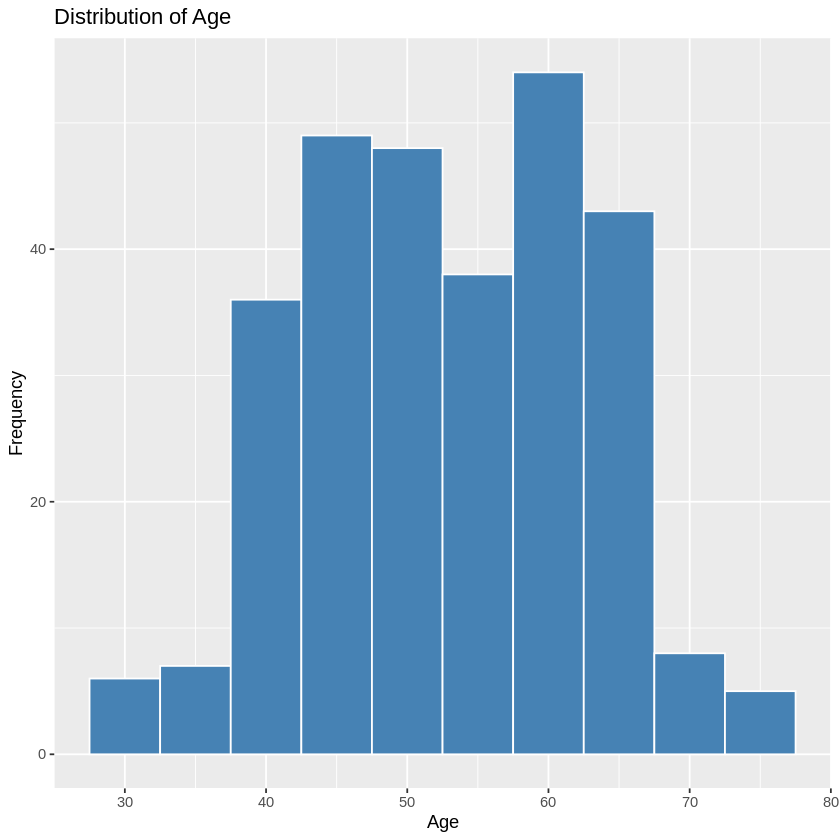

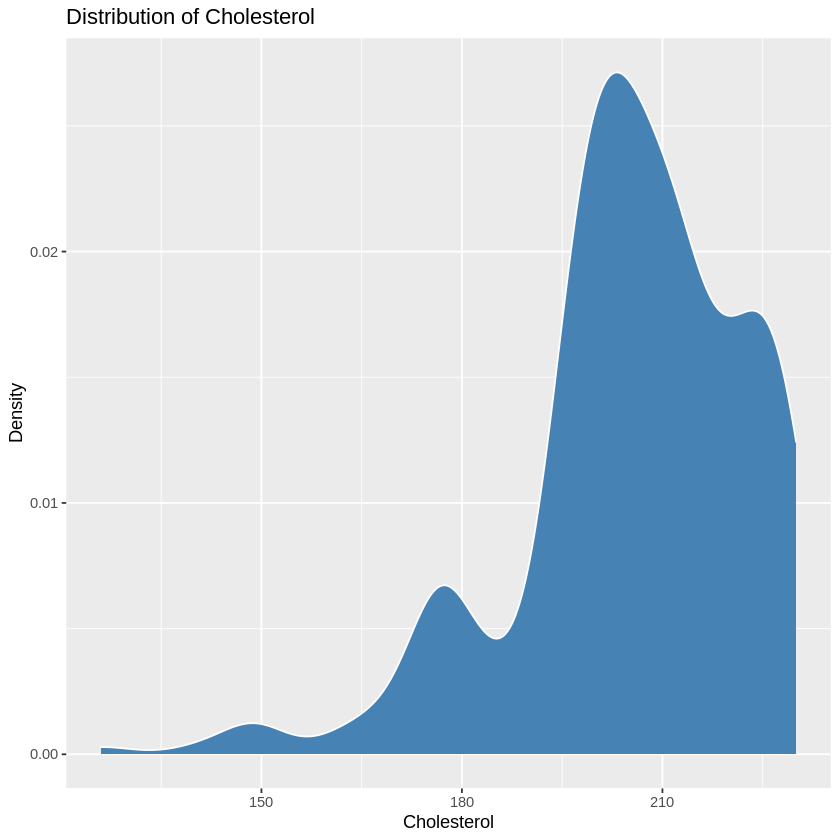

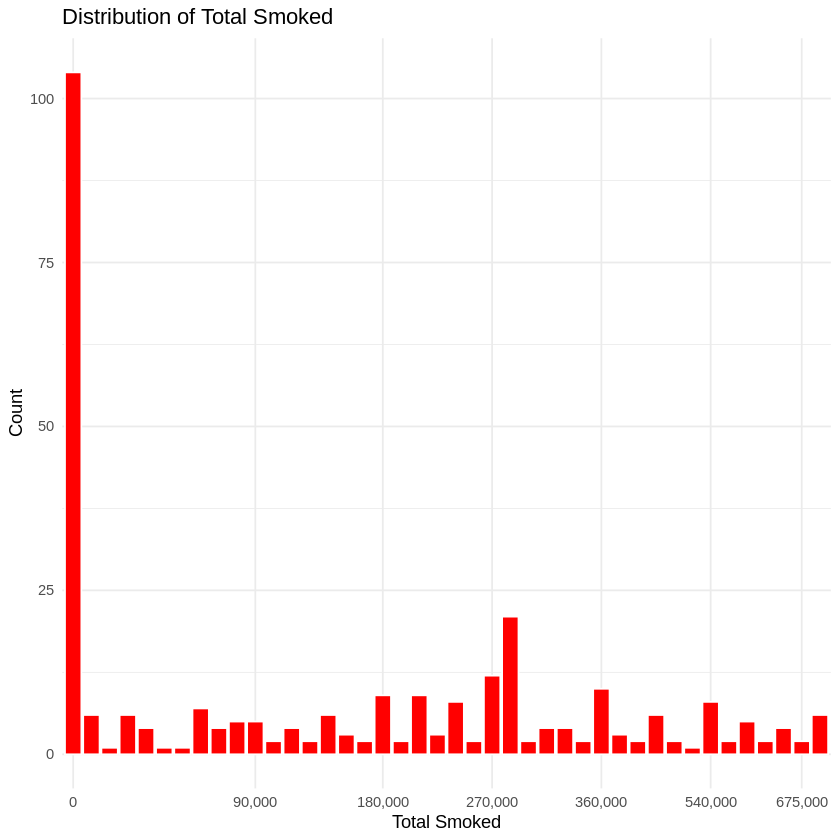

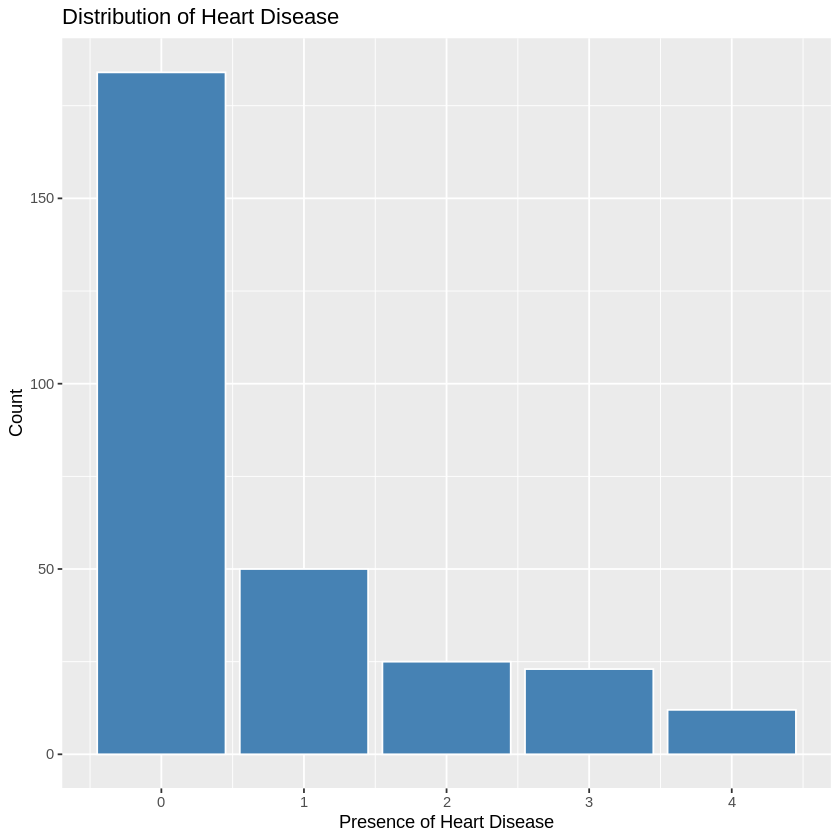

In [37]:
# Histogram of age variable
ggplot(merged_heart_disease, aes(x = age)) +
  geom_histogram(binwidth = 5, fill = "steelblue", color = "white") +
  labs(x = "Age", y = "Frequency", title = "Distribution of Age")

# Density plot of cholesterol variable
ggplot(merged_heart_disease, aes(x = chol)) +
  geom_density(fill = "steelblue", color = "white") +
  labs(x = "Cholesterol", y = "Density", title = "Distribution of Cholesterol")

# Bar plot of total_smoked variable (all red)
ggplot(merged_heart_disease, aes(x = factor(total_smoked))) +
  geom_bar(fill = "red", color = "white") +
  labs(x = "Total Smoked", y = "Count", title = "Distribution of Total Smoked") +
  scale_x_discrete(breaks = seq(0, 1000000, by = 5000),
                   labels = scales::comma(seq(0, 1000000, by = 5000))) +
  theme_minimal()



# Bar plot of num(degree of healthiness from 0, healthy, to 4, unhealthy)
ggplot(merged_heart_disease, aes(x = num)) +
  geom_bar(fill = "steelblue", color = "white") +
  labs(x = "Presence of Heart Disease", y = "Count", title = "Distribution of Heart Disease")


<h3> Base Model (age vs chol) </h3>

To begin the analysis, we will first work on the base model using cholestrol and age as the predictors. As per rationale explained in an earlier section, those variables are considered by literature to be related with the heart condition of a person, thus it would be logical to use them in the base prediction model so that it may be later contrasted to the modified model to assess the impact of using smoking data as a predictor.

Firstly, we set the seed and split the data into training and testing set per a 7:3 ratio.

In [38]:
set.seed(123)  # Set a seed for reproducibility

# Splitting the data into training and testing datasets for base model
train_ratio <- 0.7  # 70% for training, 30% for testing
num_rows <- nrow(heart_disease)
train_size <- round(train_ratio * num_rows)

train_data <- heart_disease[1:train_size, ]
test_data <- heart_disease[(train_size + 1):num_rows, ]

train_data
test_data

age,chol,num
<dbl>,<dbl>,<dbl>
63,233,0
67,286,2
67,229,1
⋮,⋮,⋮
62,244,1
37,215,0
38,231,4


age,chol,num
<dbl>,<dbl>,<dbl>
41,214,0
66,228,3
52,230,1
⋮,⋮,⋮
57,131,3
57,236,1
38,175,0


Next, we determine the optimal value of k for the k-nearest neighbors (KNN) classification model through cross-validation. Here's a brief explanation of the steps:

1. Define the range of k values: A range of k values, from 1 to 20, is specified to test different neighbors' influence on the KNN model's performance.

2. Perform cross-validation: The code performs k-fold cross-validation, splitting the training dataset into multiple folds. For each fold, the code trains a KNN model using a specific k value and evaluates its performance on the validation set.

3. Compute performance metrics: The code calculates performance metrics (in this case, the average accuracy) for each k value based on the cross-validation results. These metrics provide insights into the model's performance with different k values.

4. Plot the elbow graph: An elbow graph is generated by plotting the k values on the x-axis and the average performance metric (accuracy) on the y-axis. The graph helps visualize the relationship between k and performance.

5. Identify the optimal k value: The code determines the optimal k value by finding the point on the elbow graph where the performance significantly improves.

To finish the analysis, the final model is built using the best k value and trained. The accuracy results are calculated:

6. Train the final KNN model: The code trains the final KNN model using the optimal k value selected in the previous step. The model is trained on the entire training dataset.

7. Evaluate the model: The code evaluates the performance of the final KNN model on the testing dataset by calculating the accuracy metric. The accuracy represents the proportion of correctly classified instances.

Overall, by employing cross-validation and an elbow graph to choose the optimal k value for the KNN model, we are able to successfully build, train and benchmark the performance of our base model.

Optimal k value: 1 
Accuracy on testing data: 0.3516484 


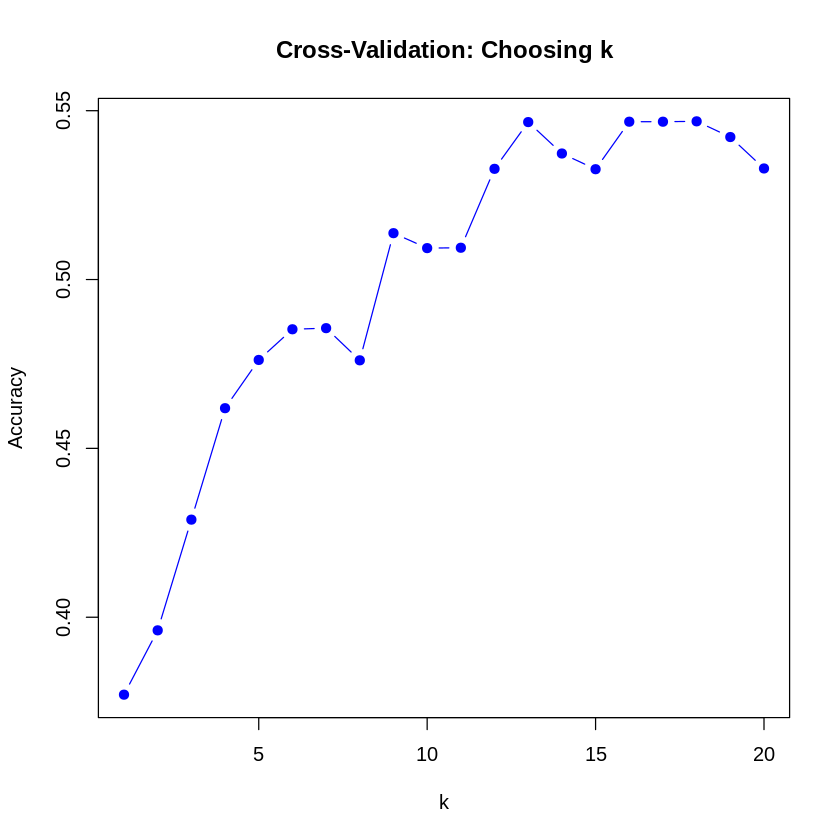

In [39]:
set.seed(123)
# Define the range of k values to test
k_values <- 1:20

# Perform cross-validation to choose the optimal k value
cv_results <- sapply(k_values, function(k) {
  # Define an empty vector to store performance metrics for each fold
  fold_scores <- numeric()

  # Perform k-fold cross-validation
  num_folds <- 5  # Choose the desired number of folds
  folds <- cut(seq(1, nrow(train_data)), breaks = num_folds, labels = FALSE)

  for (i in 1:num_folds) {
    # Split the data into training and validation sets for the current fold
    train_indices <- which(folds != i)
    valid_indices <- which(folds == i)

    train_fold <- train_data[train_indices, ]
    valid_fold <- train_data[valid_indices, ]

    # Train the KNN model with the current k value
    knn_model <- knn(train_fold[, c("age", "chol")], valid_fold[, c("age", "chol")],
                     train_fold$num, k = k)

    # Evaluate the performance of the KNN model on the validation fold
    fold_scores <- c(fold_scores, mean(knn_model == valid_fold$num))
  }

  # Compute the average performance across all folds
  mean(fold_scores)
})

# Plot the elbow graph
plot(k_values, cv_results, type = "b", pch = 19, col = "blue",
     xlab = "k", ylab = "Accuracy", main = "Cross-Validation: Choosing k")

# Identify the optimal k value based on the elbow point
elbow_point <- which.min(cv_results)
optimal_k <- k_values[elbow_point]

# Print the optimal k value
cat("Optimal k value:", optimal_k, "\n")

# Train the final KNN model with the optimal k value using the entire training dataset
final_model <- knn(train_data[, c("age", "chol")], test_data[, c("age", "chol")],
                   train_data$num, k = optimal_k)

# Evaluate the performance of the final KNN model on the testing dataset
accuracy <- mean(final_model == test_data$num)
cat("Accuracy on testing data:", accuracy, "\n")

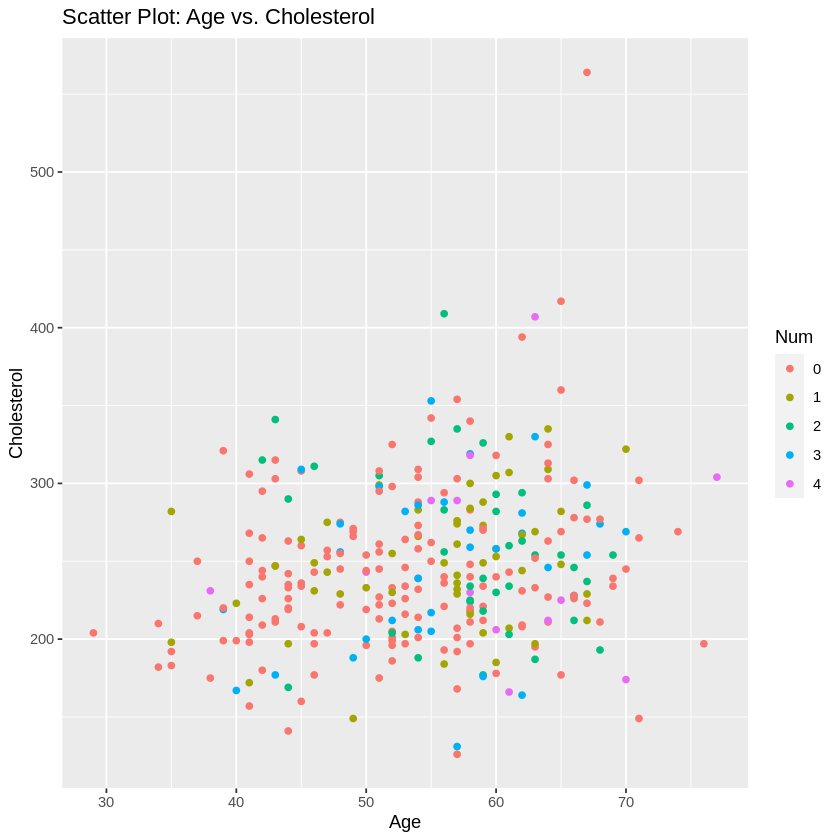

In [40]:
# Scatter plot of age vs. chol with num as legend
ggplot(heart_disease, aes(x = age, y = chol, color = factor(num))) +
  geom_point() +
  labs(x = "Age", y = "Cholesterol", title = "Scatter Plot: Age vs. Cholesterol") +
  scale_color_discrete(name = "Num")

As the accuracy calculated using `mean(final_model == test_data$num)` calculates the proportion of correctly predicted instances in the testing dataset, it compares the predicted classes (`final_model`) with the actual classes (`test_data$num`) and calculates the mean of the resulting logical vector. However, this calculation assumes that the classes are coded as binary values (e.g., 0 and 1). If the classes are encoded differently, such as "No Disease" and "Disease", this calculation may not produce accurate results.

Thus, to improve upon the potential flaws of the test above, the use of a confusion matrix is employed. The confusion matrix consists of four components: true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). From the confusion matrix, accuracy is computed as (TP + TN) / (TP + TN + FP + FN). This calculation takes into account the specific classes and provides a more comprehensive evaluation of the model's performance.

In general, the accuracy derived from the confusion matrix is considered a better metric to evaluate the model's performance. It gives insight into both the true positive rate (sensitivity) and true negative rate (specificity), allowing for a more complete assessment of the model's ability to correctly classify instances from both classes; thus, the accuracy of the confusion matrix is considered in the final conclusion.

In [41]:
set.seed(123)
# Predict the classes using the final model
predicted_classes <- ifelse(final_model == "0", "No Disease", "Disease")

# Create a data frame with predicted classes and actual classes
prediction_data <- data.frame(Predicted = predicted_classes, Actual = test_data$num)

# Compute the confusion matrix
confusion_matrix <- table(prediction_data$Actual, prediction_data$Predicted)

# Compute the accuracy
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)

# Print the confusion matrix and accuracy
cat("Confusion Matrix:\n")
print(confusion_matrix)
cat("Accuracy:", accuracy, "\n")

# Compute the ROC curve
roc_obj <- roc(prediction_data$Actual, prediction_data$Predicted)

# Plot the ROC curve
ggplot(roc_obj, aes(x = 1 - specificity, y = sensitivity)) +
  geom_line() +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "gray") +
  labs(title = "ROC Curve", x = "False Positive Rate", y = "True Positive Rate") +
  theme_bw()

Confusion Matrix:
   
    Disease No Disease
  0      18         30
  1       7          9
  2       8          8
  3       3          6
  4       1          1
Accuracy: 0.2967033 


ERROR: Error in roc(prediction_data$Actual, prediction_data$Predicted): could not find function "roc"


In conclusion, the base model using predictors suggested by literature achieved a accuracy of 0.2727, indicating that in this particular data set, the correlation between cholestrol, age and heart disease are rather weak. This is rather a surprising discovery, as it contradicts the literature; however, for the purpose of testing the impact of including smoking data as a predictor, it is not unacceptable.

<h3>Merged model with the addition of total cigerettes smoked</h3>

The following section will be analyzing the merged_heart_disease data, which includes total cigarettes smoked as a predictor. The procedures are near identical overall, thus some explaination might be omitted. The purpose of analyzing the merged_heart_disease data is to compare it to the results of the previous model which does not include smoking data, so that the effects of including smoking data as a predictor can be discussed in the conclusion.

Firstly, we set the seed and split the data into training and testing set per a 7:3 ratio.

In [42]:
set.seed(321)  # Set a seed for reproducibility

# Splitting the data into training and testing datasets
train_ratio <- 0.7  # 70% for training, 30% for testing
num_rows <- nrow(merged_heart_disease)
train_size <- round(train_ratio * num_rows)

train_data_merged <- merged_heart_disease[1:train_size, ]
test_data_merged <- merged_heart_disease[(train_size + 1):num_rows, ]

train_data_merged
test_data_merged

,chol,age,num,total_smoked
,<dbl>,<dbl>,<dbl>,<dbl>
203,212,66,2,252000
301,230,52,1,57600
94,198,41,0,0
⋮,⋮,⋮,⋮,⋮
222,216,58,1,0
7,149,49,1,0
221,216,53,0,648000


,chol,age,num,total_smoked
,<dbl>,<dbl>,<dbl>,<dbl>
71,197,58,0,270000
171,209,42,0,302400
225,218,58,1,288000
⋮,⋮,⋮,⋮,⋮
182,211,64,0,64800
49,188,49,3,626400
153,204,46,0,158400


Next, we determine the optimal value of k for the k-nearest neighbors (KNN) classification model through cross-validation. Afterwards the model is built, trained and its accuracy is tested. For details please refer to the previous section, the steps I follow are very similar.

Optimal k value: 2 
Accuracy on testing data: 0.5340909 


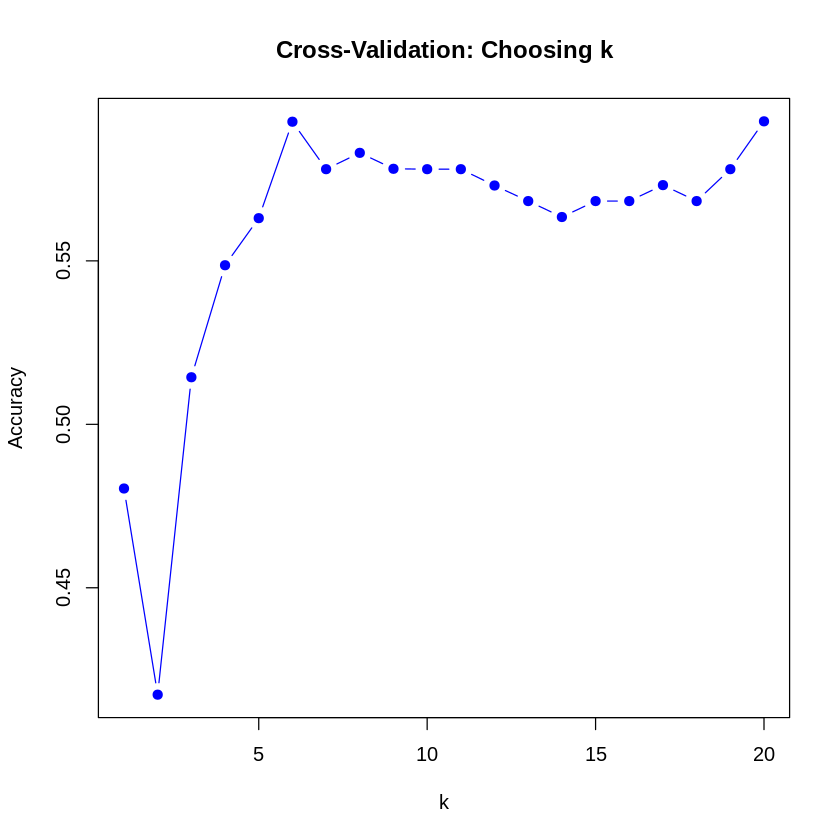

In [44]:
set.seed(321)  # Set a seed for reproducibility

# Define the range of k values to test
k_values <- 1:20

# Perform cross-validation to choose the optimal k value
cv_results <- sapply(k_values, function(k) {
  # Define an empty vector to store performance metrics for each fold
  fold_scores <- numeric()

  # Perform k-fold cross-validation
  num_folds <- 5  # Choose the desired number of folds
  folds <- cut(seq(1, nrow(train_data_merged)), breaks = num_folds, labels = FALSE)

  for (i in 1:num_folds) {
    # Split the data into training and validation sets for the current fold
    train_indices <- which(folds != i)
    valid_indices <- which(folds == i)

    train_fold <- train_data_merged[train_indices, ]
    valid_fold <- train_data_merged[valid_indices, ]

    # Train the KNN model with the current k value
    knn_model <- knn(train_fold[, c("total_smoked", "chol", "age")],
                     valid_fold[, c("total_smoked", "chol", "age")],
                     train_fold$num, k = k)

    # Evaluate the performance of the KNN model on the validation fold
    fold_scores <- c(fold_scores, mean(knn_model == valid_fold$num))
  }

  # Compute the average performance across all folds
  mean(fold_scores)
})

# Plot the elbow graph
plot(k_values, cv_results, type = "b", pch = 19, col = "blue",
     xlab = "k", ylab = "Accuracy", main = "Cross-Validation: Choosing k")

# Identify the optimal k value based on the elbow point
elbow_point <- which.min(cv_results)
optimal_k <- k_values[elbow_point]

# Print the optimal k value
cat("Optimal k value:", optimal_k, "\n")

# Train the final KNN model with the optimal k value using the entire training dataset
final_model <- knn(train_data_merged[, c("total_smoked", "chol", "age")],
                   test_data_merged[, c("total_smoked", "chol", "age")],
                   train_data_merged$num, k = optimal_k)

# Evaluate the performance of the final KNN model on the testing dataset
accuracy <- mean(final_model == test_data_merged$num)
cat("Accuracy on testing data:", accuracy, "\n")

A confusion matrix for the merged data is constructed and the accuracy of the model is tested.

In [45]:
set.seed(321)
# Train the final KNN model with the optimal k value using the entire training dataset
final_model <- knn(train_data_merged[, c("total_smoked", "chol", "age")],
                   test_data_merged[, c("total_smoked", "chol", "age")],
                   train_data_merged$num, k = optimal_k)

# Generate predictions on the testing dataset
predicted_classes <- final_model
actual_classes <- test_data_merged$num

# Create a confusion matrix
confusion_matrix <- table(predicted_classes, actual_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)

# Calculate accuracy
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
cat("Accuracy:", accuracy, "\n")

[1] "Confusion Matrix:"
                 actual_classes
predicted_classes  0  1  2  3  4
                0 42 11  2  6  1
                1  5  2  1  0  1
                2  3  1  0  2  0
                3  7  2  0  0  0
                4  0  1  1  0  0
Accuracy: 0.5 


<h1> Conclusive Discussion </h1>
In this report, we aimed to investigate whether including smoking data as a predictor improves the accuracy of predicting heart disease. Two datasets were created: "heart_disease" as the base model with two predictors (cholesterol and age), and "merged_heart_disease" with an additional predictor, total cigarettes smoked.

The results of the base model (heart_disease) showed an accuracy of 0.2967033. The confusion matrix revealed a relatively low accuracy in predicting heart disease, with a significant number of misclassifications.

On the other hand, the merged model (merged_heart_disease) achieved an accuracy of 0.5795455. The confusion matrix indicated an improvement in the accuracy of predicting heart disease compared to the base model. The merged model showed a higher number of correct classifications, particularly in the "Disease" category.

These findings were somewhat expected, as it is surprising to see the lack of correlation between the predictors suggested by literature while it is unsurprising to see smoking being a good predictor for the model as there are numerous studies on the correlation of smoking to heart disease.

The impact of these findings could be significant in the field of heart disease prediction. By incorporating smoking data, healthcare professionals and researchers can potentially enhance the accuracy of risk assessment and early detection of heart disease.These findings also open up possibilities for further research. Future studies could explore the combined impact of additional predictors, such as bloodpressure or other lifestyle factors, to create even more accurate predictive models for heart disease.

In conclusion, this report demonstrated that including smoking data as a predictor improved the accuracy of predicting heart disease. These findings can have important implications for clinical practice and research, suggesting the potential for enhanced risk assessment and early detection of heart disease by considering multiple predictors in predictive models; however, it is also important that while the report studies the effectiveness of different predictors in predicting heart disease, it does not prove any casuation between the occurance of heart diesease to any predictors. Further investigations can explore additional predictors and delve deeper into understanding the association between smoking behavior and the severity of heart diseases.

<h1> References and citations </h1>

Citations in APA format:

Wilson, P. W., D'Agostino, R. B., Levy, D., et al. (2007). Age and cardiovascular risk attributable to apolipoprotein B, low-density lipoprotein cholesterol, or non-high-density lipoprotein cholesterol. Journal of the American College of Cardiology, 49(24), 2358-2365. doi: 10.1016/j.jacc.2007.02.055.

Wilson, P. W., Abbott, R. D., & Castelli, W. P. (1998). Cholesterol and coronary heart disease: Predicting risks in older men: The National Heart, Lung, and Blood Institute Coronary Heart Disease Risk Assessment System. Archives of Internal Medicine, 158(17), 1931-1939. doi: 10.1001/archinte.158.17.1931.

Benjamin, E. J., Muntner, P., Alonso, A., et al. (2019). Tobacco Smoking and Cardiovascular Disease: A Scientific Statement from the American Heart Association. Circulation, 139(20), e937-e958. doi: 10.1161/CIR.0000000000000670

U.S. Department of Health and Human Services. (2014). The Health Consequences of Smoking—50 Years of Progress: A Report of the Surgeon General. Atlanta, GA: U.S. Department of Health and Human Services, Centers for Disease Control and Prevention, National Center for Chronic Disease Prevention and Health Promotion, Office on Smoking and Health.